# **Déterminer le besoin métier** 


<font color=red>Analyse exploratoire pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion : </font>
- **Inspecter le dataset** 
- **Extraction des données pertinentes**
- **Statistiques descriptives** 
- **Segmentation des pays pour l'expansion des contenus de formation en ligne pour un public de niveau lycée et université.**


# **Importer les librairies**

- [X] Importer ou installer librairies 

In [ ]:
# installer traducteur pour indicateur et topics
!pip install -U deep-translator
from deep_translator import GoogleTranslator
%load_ext google.colab.data_table

     |████████████████████████████████| 97 kB 4.0 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.1 which is incompatible.


In [ ]:
from IPython.display import Markdown
from DS_P2_TOOLBOX1 import *
from tabulate import tabulate
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Markdown
from termcolor import colored
#import qgrid
from google.colab import data_table

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from scipy.stats import norm
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__)
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
#data_table.DataTable(EdStatsData, include_index=True, num_rows_per_page=886930)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


4.4.1


# **Upload les fichiers Csv**

- [X] Upload les fichiers csv 

> **5 fichiers**

-  [X] Faire reconnaitre à Pandas les valeurs manquantes non répertoriées 

> **["missing", "not available","—","na"]**

In [ ]:
# Charger les Csv
# Supprimer les colonnes 100% NaN
# Remplacer les valeurs manquantes pas reconnues par Pandas
# J'ai vu qu'il y a des valeurs manquantes écris nan pour value_counts
recognize_missing_value = ["missing", "not available","—","na"]
EdStatsCountry_Series = pd.read_csv('/content/drive/MyDrive/Projet+Python_Dataset_Edstats_csv (3)/EdStatsCountry-Series.csv',na_values= recognize_missing_value).dropna(how='all', axis='columns')
EdStatsCountry = pd.read_csv('/content/drive/MyDrive/Projet+Python_Dataset_Edstats_csv (3)/EdStatsCountry.csv',na_values = recognize_missing_value).dropna(how='all', axis='columns')
EdStatsData = pd.read_csv('/content/drive/MyDrive/Projet+Python_Dataset_Edstats_csv (3)/EdStatsData.csv',na_values =recognize_missing_value).dropna(how='all', axis='columns')
EdStatsFootNote = pd.read_csv('/content/drive/MyDrive/Projet+Python_Dataset_Edstats_csv (3)/EdStatsFootNote.csv',na_values = recognize_missing_value).dropna(how='all', axis='columns')
EdStatsSeries = pd.read_csv('/content/drive/MyDrive/Projet+Python_Dataset_Edstats_csv (3)/EdStatsSeries.csv',na_values = recognize_missing_value).dropna(how='all', axis='columns')



In [ ]:
#Création dictionnaire pour accueillir tous les datasets
dfs = {'EdStatsCountry_Series' : EdStatsCountry_Series, 'EdStatsCountry' : EdStatsCountry, 'EdStatsData' : EdStatsData, 'EdStatsFootNote' : EdStatsFootNote, 'EdStatsSeries' : EdStatsSeries} 
display_dfs(dfs, justify='flex-start')

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


# **Inspecter chaque table**

- [X] Détecter les doublons 


- [X] Methode describe() pour chaque table 


- [X]  Détecter les valeurs manquantes pour chaque colonne


- [X]  Détecter les valeurs manquantes pour les rows  (EdStatsData)


- [X]  Les valeurs uniques pour chaque colonne


- [X]  Les valeurs les plus représentées 

## **Détecter les doublons**

- [x] Détecter les doublons 

> pas de doublon pour les tables 

In [ ]:
# fonction pour detecter les doublons dans plusieurs df 
def doublons_check_multi_dfs(dfs):
  for keys, df in dfs.items():
    print(f"Les doublons du df {colored(keys.upper(),'red')}: " ,len(df[df.duplicated()]))

doublons_check_multi_dfs(dfs)

Les doublons du df EDSTATSCOUNTRY_SERIES:  0
Les doublons du df EDSTATSCOUNTRY:  0
Les doublons du df EDSTATSDATA:  0
Les doublons du df EDSTATSFOOTNOTE:  0
Les doublons du df EDSTATSSERIES:  0


## **Describe**

In [ ]:
# describe pour plusieurs dataframes dans dictionnaire
def describe_all_multi_dfs(dfs):
  
  for keys, df in dfs.items():
    print(f"Le dataset : {colored(keys.upper(),'red')}")
    print(tabulate(df.describe(include='all'),headers='keys',tablefmt='pretty'))
    print('')

describe_all_multi_dfs(dfs)

Le dataset : EDSTATSCOUNTRY_SERIES
+--------+-------------+-------------+----------------------------------------------------------+
|        | CountryCode | SeriesCode  |                       DESCRIPTION                        |
+--------+-------------+-------------+----------------------------------------------------------+
| count  |     613     |     613     |                           613                            |
| unique |     211     |     21      |                            97                            |
|  top   |     GEO     | SP.POP.TOTL | Data sources : United Nations World Population Prospects |
|  freq  |     18      |     211     |                           154                            |
+--------+-------------+-------------+----------------------------------------------------------+

Le dataset : EDSTATSCOUNTRY
+--------+--------------+------------+------------+----------------------+--------------+---------------+-----------------------------------------------

## **Détecter les valeurs manquantes pour chaque colonne**

Le dataset : EDSTATSCOUNTRY_SERIES
Les dimensions du EdStatsCountry_Series : (613, 3)
Les valeurs manquantes dans chaque colonne :

+-------------+-----------+-----------+--------+----------------------+------------------+
|             | Count_NaN | %_NaN_col | Types  | Total_NaN_in_dataset | %_NaN_in_dataset |
+-------------+-----------+-----------+--------+----------------------+------------------+
| CountryCode |     0     |    0.0    | object |          0           |       0.0        |
| SeriesCode  |     0     |    0.0    | object |          0           |       0.0        |
| DESCRIPTION |     0     |    0.0    | object |          0           |       0.0        |
+-------------+-----------+-----------+--------+----------------------+------------------+


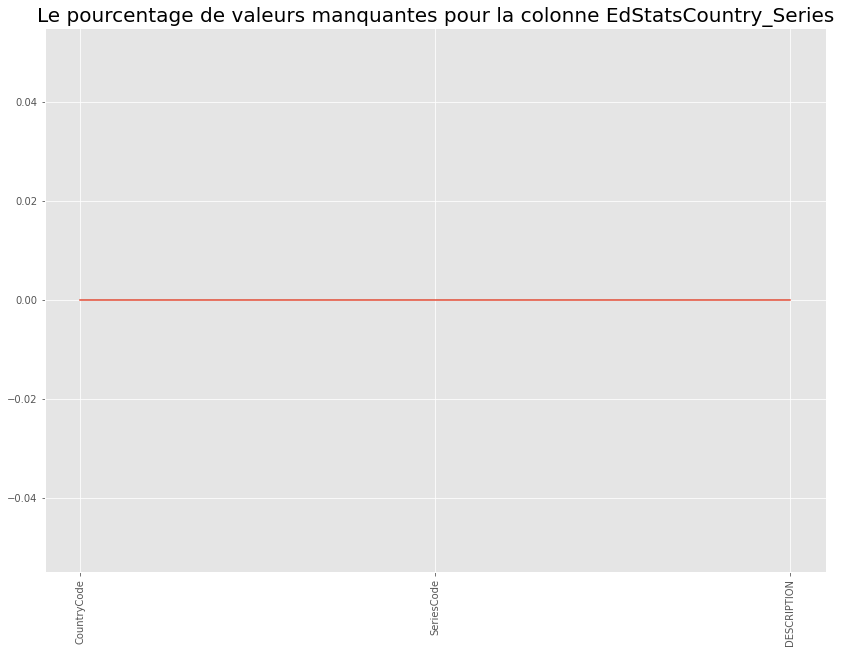


----------------------------------------------------------------------------------

Le dataset : EDSTATSCOUNTRY
Les dimensions du EdStatsCountry : (241, 31)
Les valeurs manquantes dans chaque colonne :

+---------------------------------------------------+-----------+-----------+---------+----------------------+------------------+
|                                                   | Count_NaN | %_NaN_col |  Types  | Total_NaN_in_dataset | %_NaN_in_dataset |
+---------------------------------------------------+-----------+-----------+---------+----------------------+------------------+
|         National accounts reference year          |    209    |   86.72   | float64 |         2113         |      28.28       |
|           Alternative conversion factor           |    194    |   80.5    | object  |         2113         |      28.28       |
|                   Other groups                    |    183    |   75.93   | object  |         2113         |      28.28       |
|              L

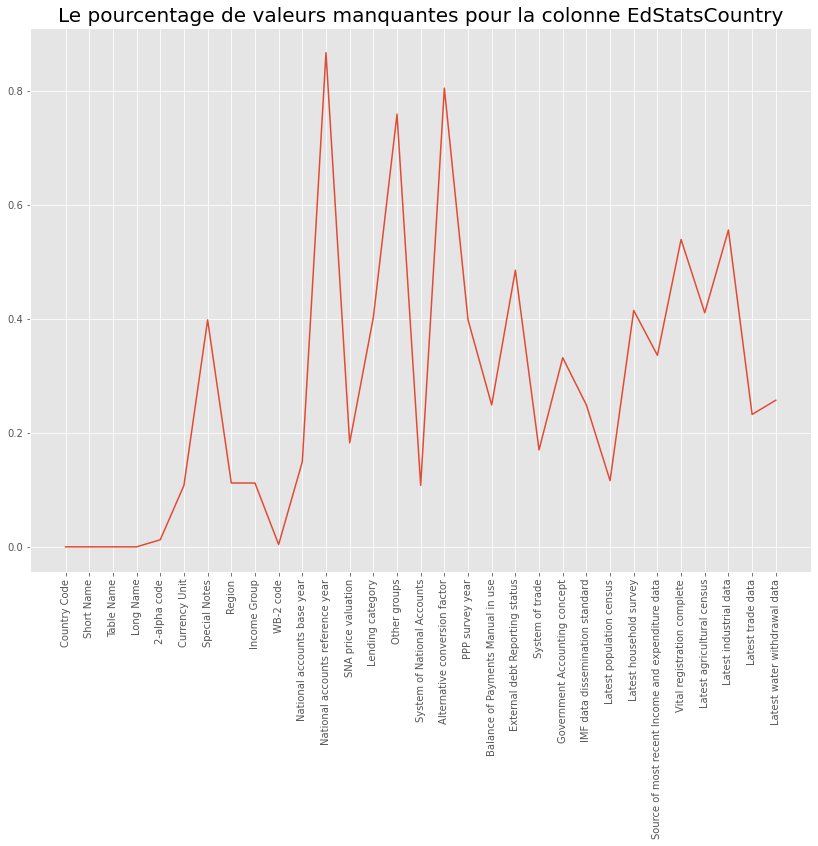


----------------------------------------------------------------------------------

Le dataset : EDSTATSDATA
Les dimensions du EdStatsData : (886930, 69)
Les valeurs manquantes dans chaque colonne :

+----------------+-----------+-----------+---------+----------------------+------------------+
|                | Count_NaN | %_NaN_col |  Types  | Total_NaN_in_dataset | %_NaN_in_dataset |
+----------------+-----------+-----------+---------+----------------------+------------------+
|      2017      |  886787   |   99.98   | float64 |       52568249       |       85.9       |
|      2016      |  870470   |   98.14   | float64 |       52568249       |       85.9       |
|      1971      |  851393   |   95.99   | float64 |       52568249       |       85.9       |
|      1973      |  851385   |   95.99   | float64 |       52568249       |       85.9       |
|      1972      |  851311   |   95.98   | float64 |       52568249       |       85.9       |
|      1974      |  851200   |   95.97 

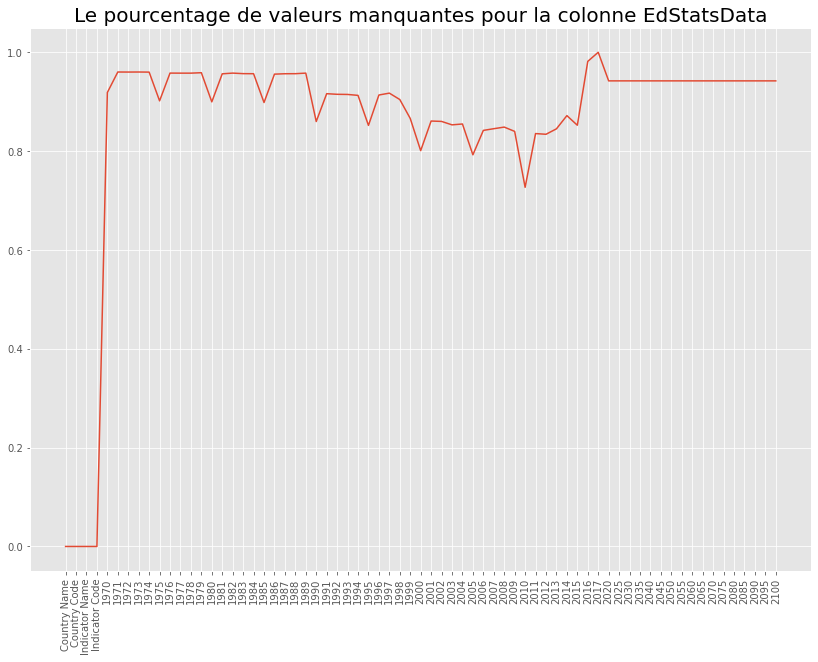


----------------------------------------------------------------------------------

Le dataset : EDSTATSFOOTNOTE
Les dimensions du EdStatsFootNote : (643638, 4)
Les valeurs manquantes dans chaque colonne :

+-------------+-----------+-----------+--------+----------------------+------------------+
|             | Count_NaN | %_NaN_col | Types  | Total_NaN_in_dataset | %_NaN_in_dataset |
+-------------+-----------+-----------+--------+----------------------+------------------+
| CountryCode |     0     |    0.0    | object |          0           |       0.0        |
| SeriesCode  |     0     |    0.0    | object |          0           |       0.0        |
|    Year     |     0     |    0.0    | object |          0           |       0.0        |
| DESCRIPTION |     0     |    0.0    | object |          0           |       0.0        |
+-------------+-----------+-----------+--------+----------------------+------------------+


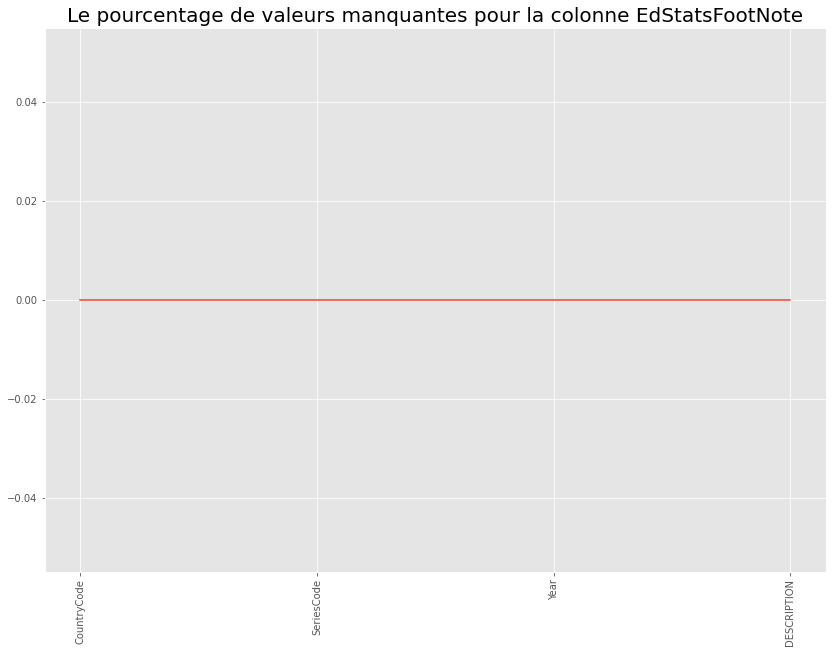


----------------------------------------------------------------------------------

Le dataset : EDSTATSSERIES
Les dimensions du EdStatsSeries : (3665, 15)
Les valeurs manquantes dans chaque colonne :

+-------------------------------------+-----------+-----------+--------+----------------------+------------------+
|                                     | Count_NaN | %_NaN_col | Types  | Total_NaN_in_dataset | %_NaN_in_dataset |
+-------------------------------------+-----------+-----------+--------+----------------------+------------------+
|        Development relevance        |   3662    |   99.92   | object |        33213         |      60.41       |
|     Limitations and exceptions      |   3651    |   99.62   | object |        33213         |      60.41       |
|          General comments           |   3651    |   99.62   | object |        33213         |      60.41       |
| Statistical concept and methodology |   3642    |   99.37   | object |        33213         |      60.41 

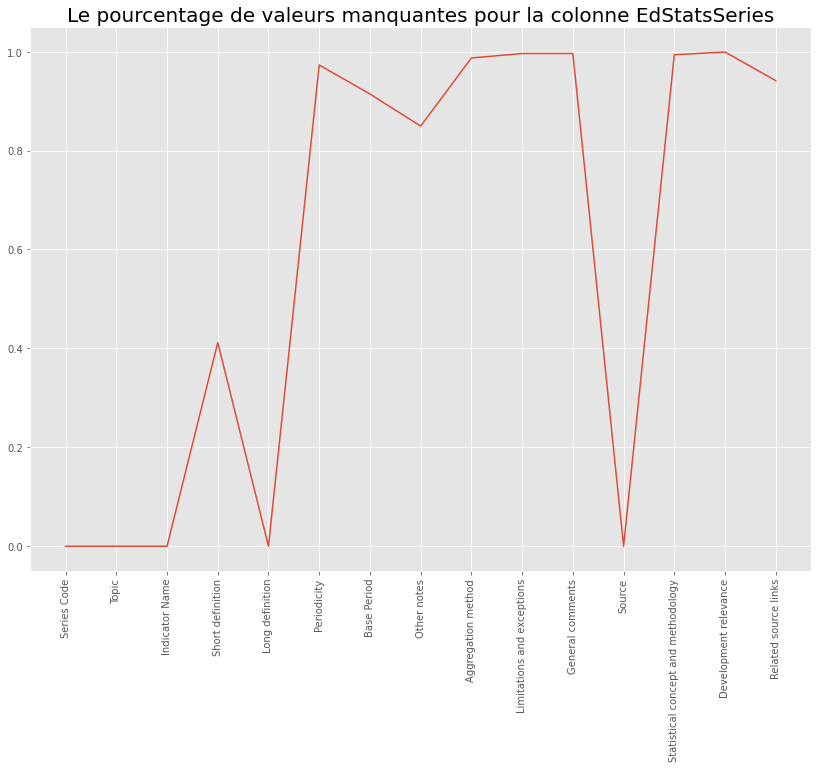


----------------------------------------------------------------------------------



In [ ]:
#Fonction pour détecter les NaN dans chaque colonne 

def NaN_columns_check_multi_dfs(dfs):
    
    for keys, df in dfs.items():
        
        print(f"Le dataset : {colored(keys.upper(),'red')}")
        print(f'Les dimensions du {keys} : {df.shape}')
        
        dtypes = df.dtypes
        missing_count = df.isnull().sum()
        value_counts = df.isnull().count()
        missing_pct = (missing_count/value_counts)*100
        missing_total = df.isna().sum().sum()
        pct_NaN_total_in_dataset= (missing_total/df.size)*100
        df_missing = pd.DataFrame({'Count_NaN':missing_count, '%_NaN_col':missing_pct, 'Types':dtypes, 'Total_NaN_in_dataset': missing_total, '%_NaN_in_dataset':pct_NaN_total_in_dataset})
        df_missing = df_missing.sort_values(by='%_NaN_col', ascending=False)
        
        print('Les valeurs manquantes dans chaque colonne :')
        print('')
        print(tabulate(round(df_missing,2),headers='keys',tablefmt='pretty'))
        
        plt.style.use('ggplot')
        plt.figure(figsize=(14,10))
        plt.title(f'Le pourcentage de valeurs manquantes pour la colonne {keys}', size=20)
        plt.plot( df.isna().sum()/df.shape[0])
        plt.xticks(rotation = 90) 
        plt.show()
        print('')
        print('----------------------------------------------------------------------------------')
        print('')
        
NaN_columns_check_multi_dfs(dfs)            
   

## **Détecter les valeurs manquantes pour les rows  (EdStatsData)**

In [ ]:
# compter le nombre colonnes pour chaque ligne 
nb_col = pd.DataFrame( EdStatsData.T.isnull().count()).rename(columns={0:'Nb_col'})
nb_col

,Nb_col
0,69
1,69
2,69
3,69
4,69
...,...
886925,69
886926,69
886927,69
886928,69


In [ ]:
# compter le nombre de NaN dans la ligne 
missing_count_rows = pd.DataFrame(EdStatsData.T.isnull().sum()).rename(columns={0:'Count_NaN'})
missing_count_rows

,Count_NaN
0,65
1,65
2,65
3,65
4,20
...,...
886925,61
886926,61
886927,61
886928,61


In [ ]:
#Voir le pct_rows_NaN dans EdStatsData
pct_rows_NaN = pd.DataFrame((EdStatsData.T.isnull().sum()/EdStatsData.T.isnull().count()*100)).rename(columns={0:'Pct_NaN_rows'})
pct_rows_NaN

,Pct_NaN_rows
0,94.202899
1,94.202899
2,94.202899
3,94.202899
4,28.985507
...,...
886925,88.405797
886926,88.405797
886927,88.405797
886928,88.405797


In [ ]:
#Voir le récapitulatif des valeurs manquantes pour chque ligne dans le df EdStatsData
df_rows_NaN = pd.concat([missing_count_rows,nb_col, pct_rows_NaN], axis=1)
df_rows_NaN

,Count_NaN,Nb_col,Pct_NaN_rows
0,65,69,94.202899
1,65,69,94.202899
2,65,69,94.202899
3,65,69,94.202899
4,20,69,28.985507
...,...,...,...
886925,61,69,88.405797
886926,61,69,88.405797
886927,61,69,88.405797
886928,61,69,88.405797


## **Les valeurs uniques pour chaque colonne**

In [ ]:
#Voir les valeurs uniques pour chaque colonne de chaque df 
for keys, df in dfs.items():
    #display (Markdown('LE DATASET : <span style="color: #ff0000">{}</span>'.format(keys)))
    print('************************************************************************************************')
    print(f"Le dataset : {colored(keys.upper(), 'red')}")
    print('')
    list_col = list(df.columns)
    
    for col in list_col:
        df2 = df[col].unique()
        df3 = df[col].nunique()
        print(colored(col,'blue'),'-------  'f'Nombre de valeurs unique : {df3}  --------------' )
        print('')
        print(df2)
        
        print('')

************************************************************************************************
Le dataset : EDSTATSCOUNTRY_SERIES

CountryCode -------  Nombre de valeurs unique : 211  --------------

['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' '

## **Value_counts**

- [X] La régions la plus représentée ou moins

> Plus :  Europe & central Asia 

> Moins :  North América (2 pays (United states, Candada)


- [X] Income group la plus représentée ou moins 

>  Plus :  Upper middle income

> moins : High income: OECD     



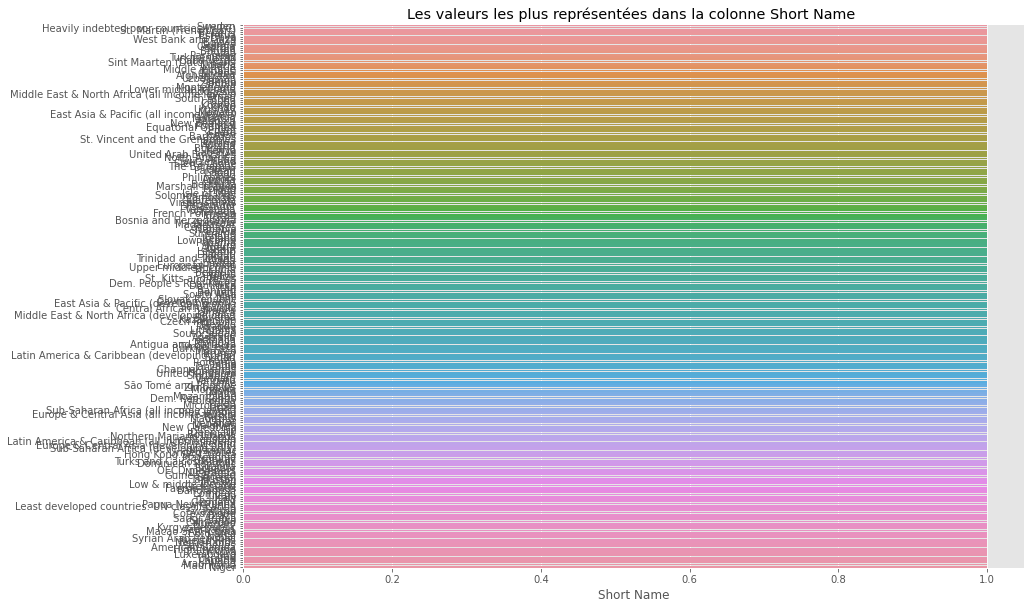

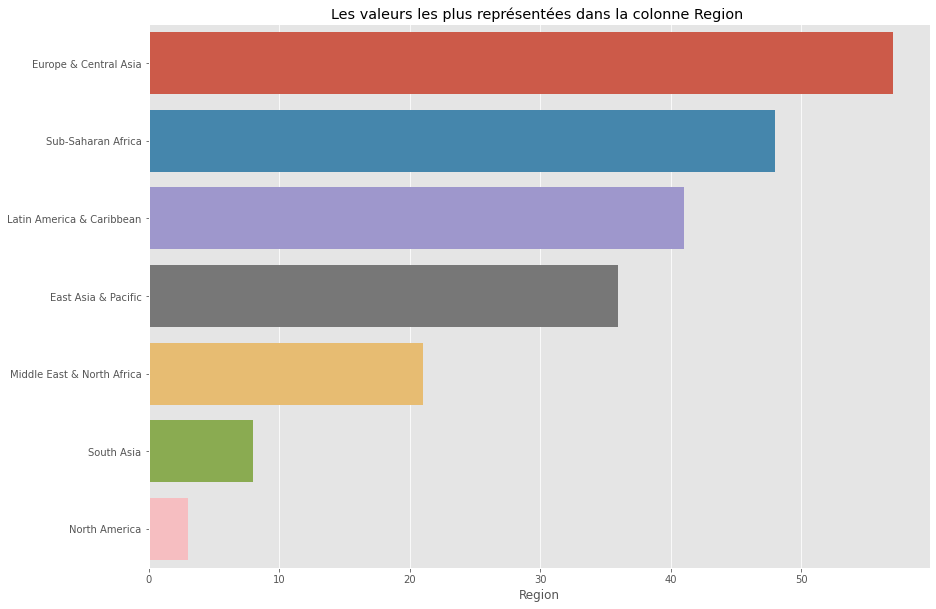

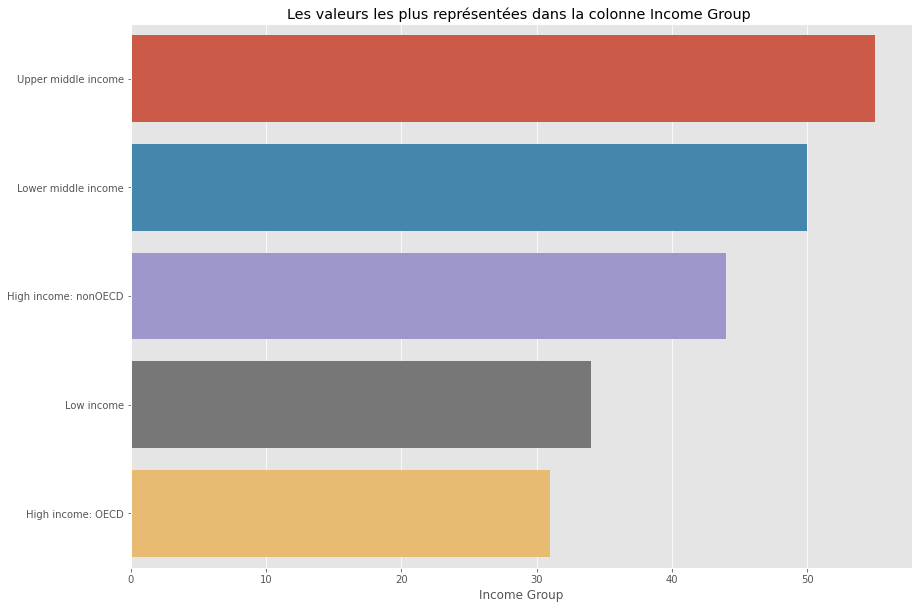

In [ ]:
# fonction pour compter les valeurs les plus représentées dans une colonne 
def value_counts_col(df, col):
  data = df[col].value_counts(dropna=False)
  plt.figure(figsize=(14,10))
  plt.title(f'Les valeurs les plus représentées dans la colonne {col} ')
  sns.barplot(y = data.index, x = data, orient='h')
  print('')
# voir les valeurs les plus représentées dans le EdStatsCountry
# sélectionner les noms des colonnes choisis 
list_columns=['Short Name', 'Region', "Income Group"]
for col in list_columns:
  value_counts_col(EdStatsCountry,col)

### Value_counts avec NaN égal (String)

- [X] Topics les plus représentés 

> Learning outcomes , Attainment

In [ ]:
# ne pas supprimer NaN (nan est reconnu par pandas comme NaN)
data = EdStatsCountry['Income Group'].value_counts(dropna=False)
data

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
NaN                     27
Name: Income Group, dtype: int64

In [ ]:
#Voir les index pour nan qui est un float et le reste sont des strings
data.index

Index([ 'Upper middle income',  'Lower middle income', 'High income: nonOECD',
                 'Low income',    'High income: OECD',                    nan],
      dtype='object')

In [ ]:
#le nan est un float 
print("le nan est un :", type(data.index[5]))

# transformer nan float en str
string_nan = str(data.index[5])
print('Tranformer nan en :', type(string_nan))

le nan est un : <class 'float'>
Tranformer nan en : <class 'str'>


In [ ]:
# remplacer nan(float) par NaN (str) pour les 3 datasets
EdStatsCountry_NaN_STR = EdStatsCountry.fillna('NaN')
EdStatsData_NaN_STR = EdStatsData.fillna('NaN')
EdStatsSeries = EdStatsSeries.fillna('NaN')


In [ ]:
# voir les colonnes 
EdStatsData_NaN_STR.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

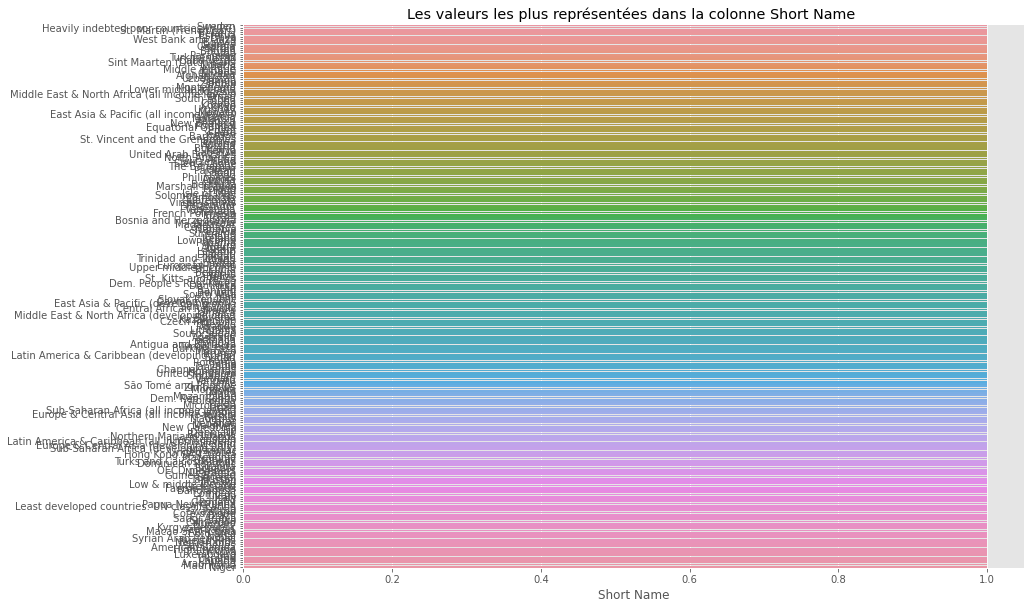

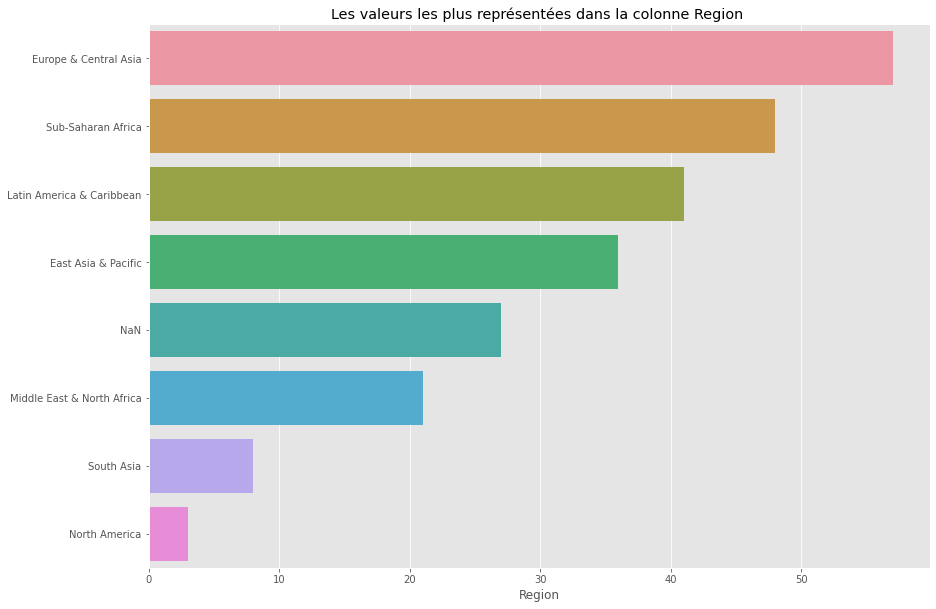

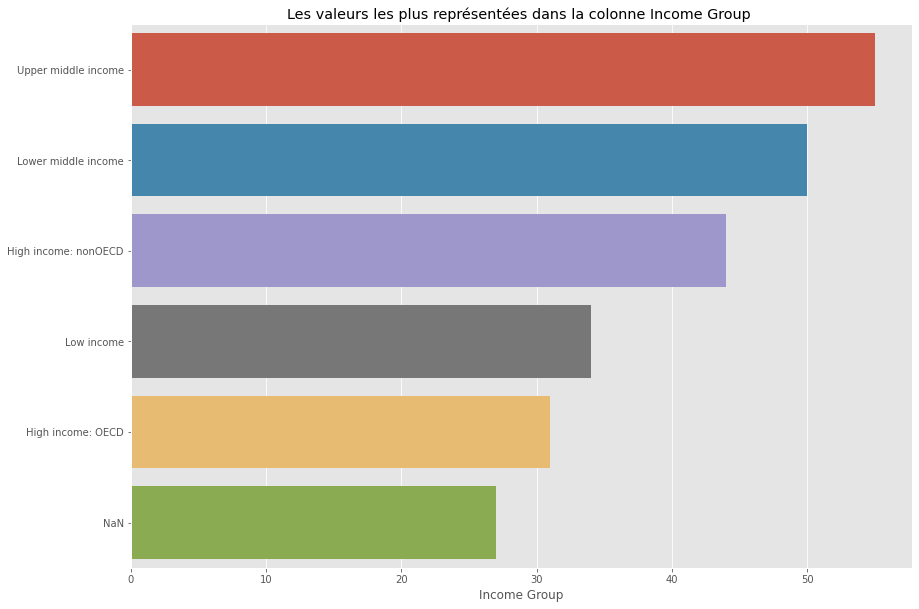

In [ ]:
# voir les valeurs les plus représentées dans le EdStatsCountry_NaN_STR (nan float tranformer en NaN str)
# sélectionner les noms des colonnes choisis 
list_columns=['Short Name', 'Region', "Income Group"]
for col in list_columns:
  value_counts_col(EdStatsCountry_NaN_STR,col)

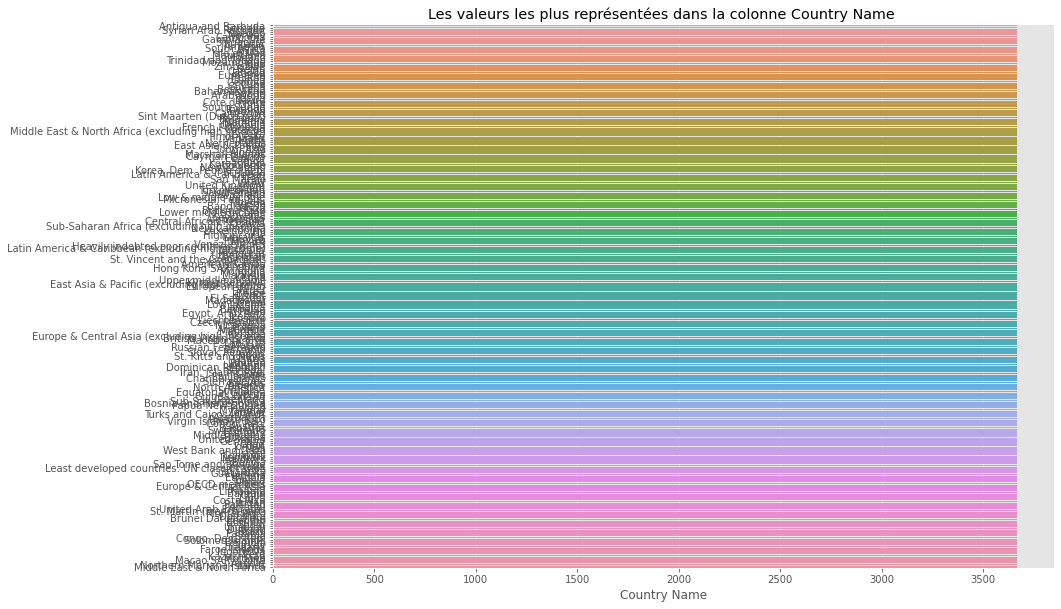

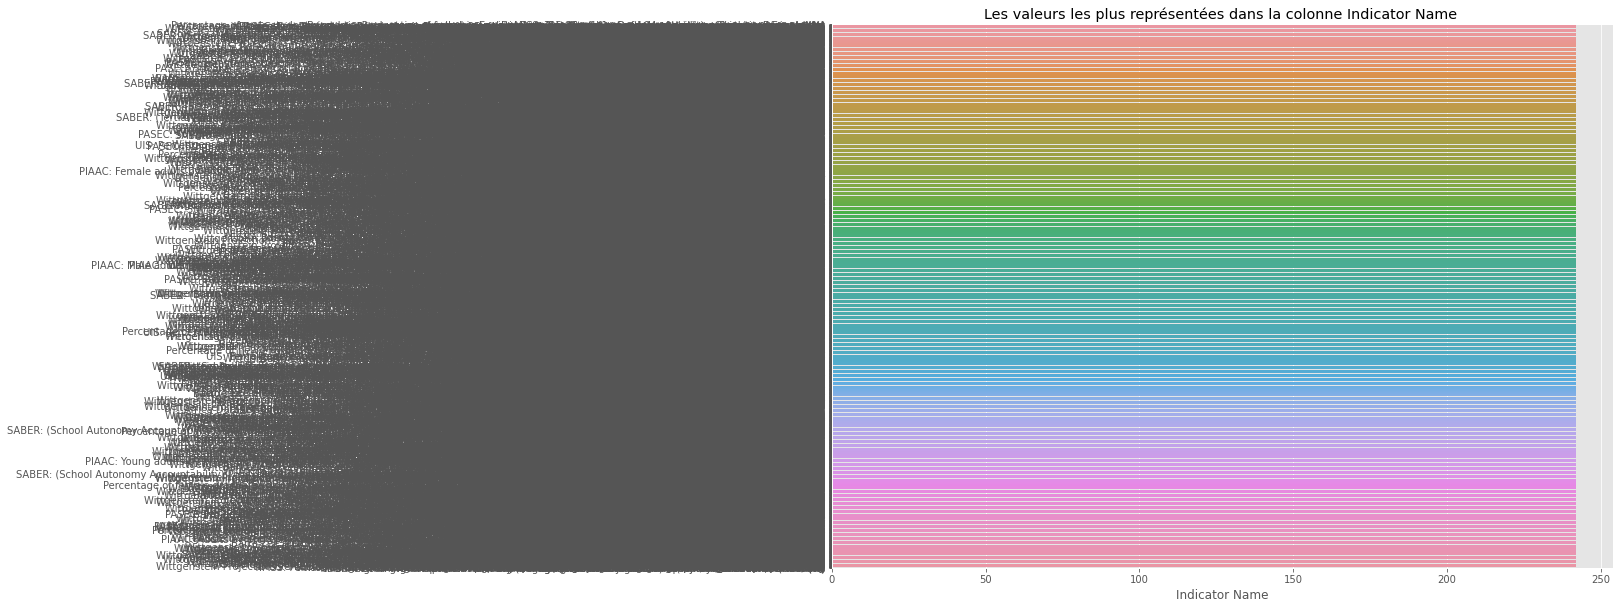

In [ ]:
# voir les valeurs les plus représentées dans le EdStatsData_NaN_STR (nan float tranformer en NaN str)
# sélectionner les noms des colonnes choisis 
list_columns=['Country Name', 'Indicator Name']
for col in list_columns:
  value_counts_col(EdStatsData_NaN_STR,col)

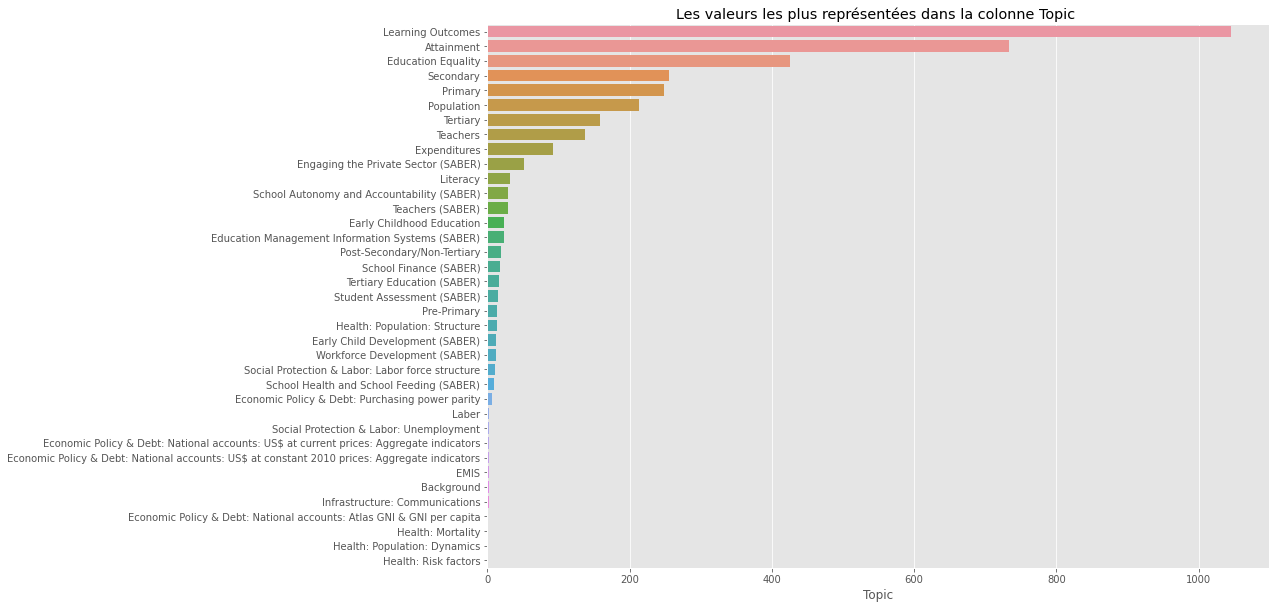

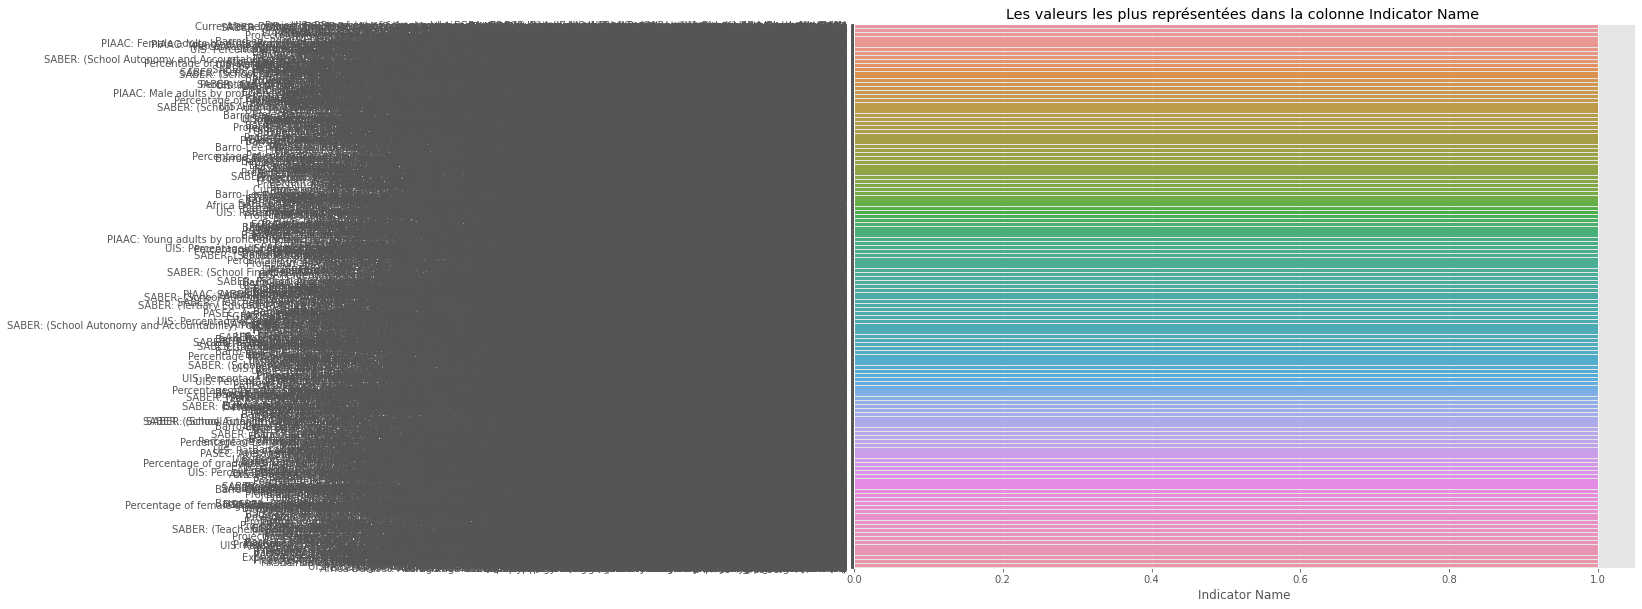

In [ ]:
# voir les valeurs les plus représentées dans le EdStatsSeries(nan float tranformer en NaN str)
# sélectionner les noms des colonnes choisis 
list_columns=['Topic', 'Indicator Name']
for col in list_columns:
  value_counts_col(EdStatsSeries,col)

# **Les clés primaires**

- [X] Vérifier les clés primaires pour les jointures 

In [ ]:
# ajouter dans une liste toutes les noms des colonnes de chaque table 
all_cols = list(EdStatsCountry_Series.columns)+ list(EdStatsCountry.columns)+list(EdStatsData.columns)+list(EdStatsFootNote.columns)+list(EdStatsSeries.columns)
# compter dans une liste le nombre d'occurence 
from collections import Counter

# voir les clés pour merging sur les 5 tables 
ob = Counter(all_cols)
print('Les clés primaires pour les tables : ')
print('')
for k, v in ob.items():
  if v >1:
    print(f"{k}: {v} occurences ")


Les clés primaires pour les tables : 

CountryCode: 2 occurences 
SeriesCode: 2 occurences 
DESCRIPTION: 2 occurences 
Country Code: 2 occurences 
Indicator Name: 2 occurences 


# **Merge table**

- [X] Merge autour de la table EdStatsData

> how = merge left 

> on='Indicator Name'

> on='Country Code' 

In [ ]:
# voir le shape et les colonnes de chaque table 

list_df = [EdStatsCountry ,EdStatsCountry,  EdStatsCountry_Series, EdStatsSeries, EdStatsFootNote]
for keys, df in dfs.items():
  print(f"{colored(keys, 'red')} shape :", df.shape)
  print('')
  print(df.columns)
  print('-------------------------------------------------------------')
  print('')


EdStatsCountry_Series shape : (613, 3)

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION'], dtype='object')
-------------------------------------------------------------

EdStatsCountry shape : (241, 31)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'La

In [ ]:
#merge entre country3 et country5 
df_merged1 = EdStatsData.merge(EdStatsSeries, how='left', on='Indicator Name')
print(df_merged1.shape)
df_merged1.head(1)

(886930, 83)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Series Code,Topic,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UIS.NERA.2,Secondary,NaN,Total number of students of the official lower...,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN


In [ ]:
#Vérifier le pays qui est dans le df_merged1 et qui n'est pas dans le df EdStatsCountry
print('Le nombre de pays uniques dans df_merged :', df_merged1['Country Code'].nunique())
print('Le nombre de pays uniques dans EdStatsCountry :', EdStatsCountry['Country Code'].nunique())
list_pays =list(EdStatsCountry['Country Code'])
print("Le pays qui n'est pas dans EdStatsCountry est :",list(df_merged1[~df_merged1['Country Code'].isin(list_pays)]['Country Name'].unique()))

Le nombre de pays uniques dans df_merged : 242
Le nombre de pays uniques dans EdStatsCountry : 241
Le pays qui n'est pas dans EdStatsCountry est : ['British Virgin Islands']


In [ ]:
# Merge entre df_merged1 et EdStatsCountry
df_fusion = df_merged1.merge(EdStatsCountry , how='left', on='Country Code')
print(df_fusion.shape)
df_fusion.head(1)

(886930, 113)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# modifier l'odre des colonnes 
all_cols = df_fusion.columns.tolist()
print(all_cols)

#Modifier l'ordre des colonnes 
new_index =['Country Name', 'Country Code','Series Code','Topic','Indicator Name', 'Indicator Code','Short definition', 'Long definition', 'Region','Income Group','1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',  'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data']
df_fusion = df_fusion.reindex(columns=new_index )
df_fusion.sample(10)

['Country Name', 'Country Code', 'Series Code', 'Topic', 'Indicator Name', 'Indicator Code', 'Short definition', 'Long definition', 'Region', 'Income Group', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'WB-2 code', 'Na

,Country Name,Country Code,Series Code,Topic,Indicator Name,Indicator Code,Short definition,Long definition,Region,Income Group,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2095,2100,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
209926,Cabo Verde,CPV,LO.EGRA.READ.CHC.ADV.2GRD,Learning Outcomes,EGRA: Reading Comprehension - Share of student...,LO.EGRA.READ.CHC.ADV.2GRD,Share of students who scored 80 percent or hig...,Share of students who scored 80 percent or hig...,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EGRA,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https:/...,NaN,NaN,NaN,Cabo Verde,Cabo Verde,Republic of Cabo Verde,CV,Cabo Verde escudo,Cabo Verde is the new name for the country pre...,CV,2007,NaN,Value added at producer prices (VAP),Blend,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2005","Expenditure survey/budget survey (ES/BS), 2007",Yes,2014,NaN,2012.0,2001
408118,Hungary,HUN,UIS.G.8.T,Tertiary,Graduates from ISCED 8 programmes in tertiary ...,UIS.G.8.T,NaN,Total number of students successfully completi...,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Hungary,Hungary,Hungary,HU,Hungarian forint,April 2012 database update: Based on data from...,HU,Original chained constant price data are resca...,2005.0,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"World Health Survey (WHS), 2003","Expenditure survey/budget survey (ES/BS), 2007",Yes,2010,2009.0,2012.0,2007
664042,Portugal,PRT,UIS.DR.2.GPV.G2.M,Secondary,Drop-out rate from Grade 2 of lower secondary ...,UIS.DR.2.GPV.G2.M,NaN,Proportion of male pupils from a cohort enroll...,Europe & Central Asia,High income: OECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.85078,2.67208,NaN,NaN,NaN,NaN,NaN,NaN,18.943279,15.36628,NaN,NaN,NaN,NaN,13.76654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Portugal,Portugal,Portuguese Republic,PT,Euro,A simple multiplier is used to convert the nat...,PT,2005,NaN,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 1997",Yes,2009,2009.0,2012.0,2002
134320,Austria,AUT,NaN,NaN,"Population, age 20, female",SP.POP.AG20.FE.UN,NaN,NaN,Europe & Central As

# **Reduce memory df_fusion**

- [X] Réduction de la mémoire du dataset fusionner (30.7%)

In [ ]:
# réduire la mémoire du df_fusion
reduce_memory_usage(df_fusion, verbose=True)

Mem. usage decreased to 534.57 Mb (30.7% reduction)


,Country Name,Country Code,Series Code,Topic,Indicator Name,Indicator Code,Short definition,Long definition,Region,Income Group,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2095,2100,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,Arab World,ARB,UIS.NERA.2,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,Total number of students of the official lower...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,UIS.NERA.2.F,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,Total number of female students of the officia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,UIS.NERA.2.GPI,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,Ratio of female adjusted net enrolment rate fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,UIS.NERA.2.M,Secondary,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,Total number of male students of the official ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,SE.PRM.TENR,Primary,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,Total number of students of the official prima...,NaN,NaN,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# **Sauvegarder le dataframe fusionner**

- [x] Sauvegarder le dataframe fusionner 


- [X] Utilisation de la table fusionner sur P2_01_notebook_df_fusion 

In [ ]:
# sauvegarder df_fusion1 
df_fusion.to_csv('df_fusion_reduce_memory.csv', index=False)